# **Import Modules**

## *python*

In [1]:
# Import python modules
import os,sys
import pandas as pd

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._02_Feature_Engineering import FraudDetectionPipeline

except ImportError:
    print('Could not import module from `scripts/`.')

# **Feature Engineering and Fraud Detection Pipeline**

In [3]:
# Define DataFrame path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/processed_data.csv')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'plots/featureengineering')
df_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','processed')
mdl_dir = os.path.join(os.path.dirname(os.getcwd()), 'models')

In [4]:
# Initalise pipeline
pipeline = FraudDetectionPipeline(df_path = df_path, df_dir = df_dir,
                                    plot_path = plot_path, mdl_dir = mdl_dir)

# Load data and save processed data
pipeline.load_and_split_data()
pipeline.save_processed_data()

Data loaded, split, aggregated, and categorical NAs filled.

Processed DataFrame saved to: ..\data\processed\feature_engineering_data.csv

DataFrame Head:


,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2,15,11,2018,1000.00,500.000000,2,0.000000
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,1000,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610



DataFrame Description:


,Amount,Value,PricingStrategy,FraudResult,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
count,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.495000e+04
mean,6.717846e+03,2358.107524,2.255974,0.002018,12.447722,15.902898,6.566233,2018.497115,-3.599090e+06,6.717846e+03,392.982982,1.803696e+04
std,1.233068e+05,3116.839524,0.732924,0.044872,4.846964,8.962822,5.224310,0.499994,2.180271e+07,8.568352e+04,878.631072,8.929570e+04
min,-1.000000e+06,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,-1.049000e+08,-4.250000e+05,1.000000,0.000000e+00
25%,-5.000000e+01,275.000000,2.000000,0.000000,8.000000,8.000000,1.000000,2018.000000,6.000000e+04,1.260812e+03,32.000000,3.206563e+03
50%,1.000000e+03,1000.000000,2.000000,0.000000,13.000000,16.000000,11.000000,2018.000000,2.015113e+05,2.272951e+03,93.000000,5.896327e+03
75%,2.800000e+03,3000.000000,2.000000,0.000000,17.000000,24.000000,12.000000,2019.000000,7.089360e+05,4.080464e+03,273.000000,1.038269e+04
max,9.880000e+06,12050.000000,4.000000,1.000000,23.000000,31.000000,12.000000,2019.000000,8.345124e+07,8.601821e+06,4091.000000,3.309916e+06


In [5]:
# Compute breaks and apply transformation
pipeline.compute_monotonic_breaks()
pipeline.compute_categorical_breaks()
pipeline.apply_woe_transformation()

# Prepare and save DataFrame
pipeline.merge_and_clean()


Numeric WOE breaks computed.
[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20250702_051318.py

Categorical WOE breaks computed and merged.
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...

WOE transformation applied.

Final dataset merged and cleaned.


In [6]:
# WoE and IV transformation
pipeline.run_iv_analysis()
pipeline.filter_variables()

IV Analysis:

                variable  info_value
21            Amount_woe    7.828734
18                Amount    6.712406
8     std_txn_amount_woe    5.219029
7                  Value    5.016896
10  total_txn_amount_woe    4.438720
6     avg_txn_amount_woe    4.333268
9         ProviderId_woe    3.592138
1          ProductId_woe    3.353317
5       total_txn_amount    1.908611
0         avg_txn_amount    1.903049
22        std_txn_amount    1.876843
16         ChannelId_woe    1.457114
17             txn_count    1.052966
13   ProductCategory_woe    0.932981
24               txn_day    0.681237
2               txn_hour    0.435640
4              txn_month    0.176962
20          txn_hour_woe    0.149812
15              txn_year    0.090093
14          txn_year_woe    0.090093
12   PricingStrategy_woe    0.083034
19         txn_count_woe    0.071860
3              Value_woe    0.040301
23         txn_month_woe    0.017169
11           txn_day_woe    0.012828
[INFO] filtering variabl

Model trained.

Coefficients:
[[ 1.79523807e-07 -7.70698045e-01 -5.03576641e-02 -3.08737748e-02
  -1.72910541e-08 -9.01661071e-04 -6.50752382e-01 -9.07661572e-01
   0.00000000e+00  9.94008358e-01  0.00000000e+00 -1.62910536e-03
   6.25699483e-01 -8.01052589e-03  2.38008361e-06 -1.26584166e+00
  -1.17046347e-06  1.24845535e-03]]

Train Performance:


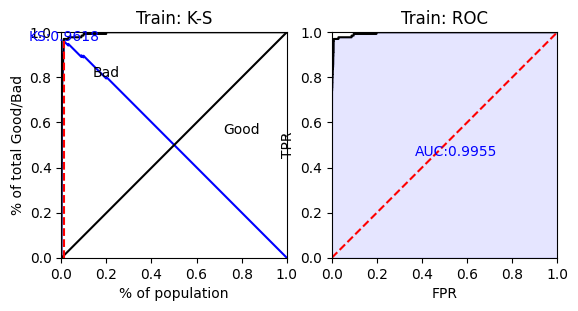

Test Performance:


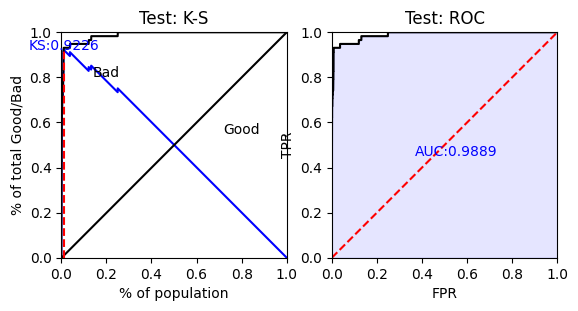

Accuracy: 0.9981184013380258
AUC Score: 0.6205150802623199

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.58      0.24      0.34        58

    accuracy                           1.00     28699
   macro avg       0.79      0.62      0.67     28699
weighted avg       1.00      1.00      1.00     28699


Plot saved to ..\plots\featureengineering\Confusion Matrix - Logistic Regression.png


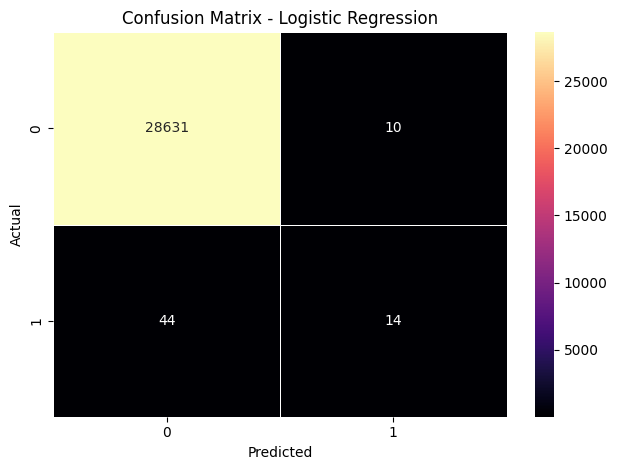

In [7]:
# Model training evaluation and prediction
pipeline.train_model()

pipeline.evaluate_model()

#pipeline.predict(df_new)

In [8]:
# Save the model
pipeline.save_model()


Model saved to: ..\models\fraud_model.pkl


In [9]:
# Open saved model
pipeline.load_model()


Model loaded from: ..\models\fraud_model.pkl
